In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import time

In [2]:
#Reading train and test data from local path
train_data = pd.read_csv('G:\Data_Science\Datasets\mnist_train.csv')
test_data = pd.read_csv('G:\Data_Science\Datasets\mnist_test.csv')

In [3]:
#iterate through train data
xtrain = []
ytrain = []
for index,rows in train_data.iterrows():
    xtrain.append(np.array(rows[1:].tolist()))
    ytrain.append(rows[0])

In [4]:
#iterate through test data
xtest = []
ytest = []
for index,rows in test_data.iterrows():
    xtest.append(np.array(rows[1:].tolist()))
    ytest.append(rows[0])

In [5]:
#Performing Normalization to train data
x_train = np.array(xtrain).astype('float32')
y_train = np.array(ytrain)
x_test = np.array(xtest).astype('float32')
y_test = np.array(ytest)
x_train /=255
x_test/=255

In [9]:
#Split the test and train data with test size of 0.1
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size =0.1,random_state = 102)
X_test.shape

(6000, 784)

In [11]:
#finding K Value by accuracy_score
score_list = {}
for k in range(1,30):
    model = KNeighborsClassifier(k)
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    score_list[k]=accuracy_score(y_pred,Y_test)
    

1599173308.6749842
1
1599173347.6594064
1599173795.8431556
1599173795.8431556
2
1599173834.7686753
1599174275.0605786
1599174275.0762053
3
1599174312.9944324
1599175051.9308476
1599175051.9308476
4
1599175090.222841
1599175541.3636034
1599175541.3636034
5
1599175579.808096
1599176030.8969166
1599176030.8969166
6
1599176069.4776204
1599176520.6432295
1599176520.6432295
7
1599176558.9314308
1599177010.640476
1599177010.640476
8
1599177048.6626337
1599177499.9105086
1599177499.9105086
9
1599177537.8624284
1599177989.8061776
1599177989.8061776
10
1599178028.9326878
1599178481.2444932


In [51]:

print(score_list)

{1: 0.9713333333333334, 2: 0.9643333333333334, 3: 0.9721666666666666, 4: 0.9693333333333334, 5: 0.97, 6: 0.9678333333333333, 7: 0.9686666666666667, 8: 0.967, 9: 0.9668333333333333, 10: 0.9656666666666667}


In [18]:
#getting best accuracy from score_list
model_final = KNeighborsClassifier(max(score_list,key=score_list.get))

In [19]:
#Using Best K value training model
model_final.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
#Predicting by test data
pred=model_final.predict(xtest)

3

In [55]:
arr = []
arr.append(xtest[6666])

In [56]:
p=model_final.predict(arr)

C:\Users\Prasanth\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


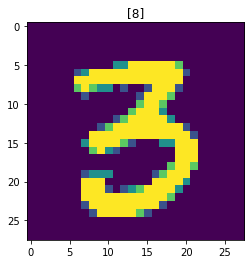

In [57]:
plt.imshow(xtest[6666].reshape(28,28))
plt.title(p)
plt.show()

Sakthij
